<a href="https://colab.research.google.com/github/Christian-Iyke/SENTIMENT_ANALYSIS_USING_HUGGING_FACE/blob/main/SENTIMENT_ANALYSIS_USING_HUGGING_FACE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#!pip3 install datasets
#!pip3 install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.8 MB/s eta 0:00:00


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from datasets import load_dataset
from transformers import AutoTokenizer
from transformers import TrainingArguments
from transformers import AutoModelForSequenceClassification
from transformers import Trainer
from datasets import load_metric
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load the dataset and display some values
url = 'https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_P5-NLP/master/zindi_challenge/data/Train.csv'
data = pd.read_csv(url)


# Dataset is now stored in a Pandas Dataframe

#df = pd.read_csv('')
data.head(10)

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.000000
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.000000
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.000000
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.000000
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.000000
5,OVNPOAUX,<user> a nearly 67 year old study when mental ...,1.0,0.666667
6,JDA2QDV5,"Study of more than 95,000 kids finds no link b...",1.0,0.666667
7,S6UKR4OJ,psa: VACCINATE YOUR FUCKING KIDS,1.0,1.000000
8,V6IJATBE,Coughing extra on the shuttle and everyone thi...,1.0,0.666667
9,VB25IDQK,AIDS vaccine created at Oregon Health &amp; Sc...,1.0,0.666667


EXPLORATORY DATA ANALYSIS (EDA)

In [5]:
# Check for missing values
data.isna().sum()

tweet_id     0
safe_text    0
label        1
agreement    2
dtype: int64

<Axes: >

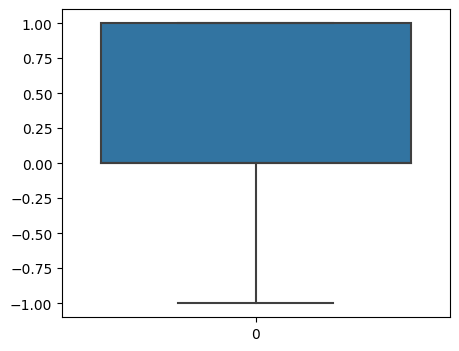

In [14]:
# Checking for outlinears
fig, ax = plt.subplots(figsize=(5,4))
sns.boxplot(data.label)

<Axes: xlabel='label', ylabel='Density'>

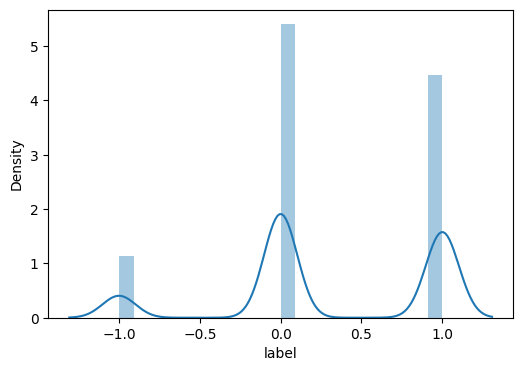

In [16]:
# To view distribution of the Label variable
fig, ax = plt.subplots(figsize=(6,4))
sns.distplot(data.label)

From the above, the distribution is skwed towards the right, we shall use mode to fill the mising values.

In [17]:
# filling the missing values with the most frequency

data['label'] = data['label'].fillna(data['label'].mode()[0])

data['agreement'] = data['agreement'].fillna(data['agreement'].mode()[0])

In [18]:
# Reconfirming the treated missing values
data.isna().sum()

tweet_id     0
safe_text    0
label        0
agreement    0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   10001 non-null  object 
 1   safe_text  10001 non-null  object 
 2   label      10001 non-null  float64
 3   agreement  10001 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.7+ KB
